In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('Titanic_Cleaned_LabelEncoded.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,0.432793,-0.473674,-0.502445,False,True
1,3,1,3,0,-0.258337,-0.474545,-0.473674,-0.488854,False,True
2,4,1,1,0,0.433312,0.432793,-0.473674,0.420730,False,True
3,5,0,3,1,0.433312,-0.474545,-0.473674,-0.486337,False,True
4,6,0,3,1,-0.104637,-0.474545,-0.473674,-0.478116,True,False
...,...,...,...,...,...,...,...,...,...,...
703,887,0,2,1,-0.181487,-0.474545,-0.473674,-0.386671,False,True
704,888,1,1,0,-0.796286,-0.474545,-0.473674,-0.044381,False,True
705,889,0,3,0,-0.104637,0.432793,2.008933,-0.176263,False,True
706,890,1,1,1,-0.258337,-0.474545,-0.473674,-0.044381,False,False


#  Summary Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  708 non-null    int64  
 1   Survived     708 non-null    int64  
 2   Pclass       708 non-null    int64  
 3   Sex          708 non-null    int64  
 4   Age          708 non-null    float64
 5   SibSp        708 non-null    float64
 6   Parch        708 non-null    float64
 7   Fare         708 non-null    float64
 8   Embarked_Q   708 non-null    bool   
 9   Embarked_S   708 non-null    bool   
dtypes: bool(2), float64(4), int64(4)
memory usage: 45.8 KB


In [4]:
df.describe(include='all')  # Includes numerical + categorical

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708,708
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,637,534
mean,449.714689,0.331921,2.518362,0.680791,-0.100621,-0.111866,-0.084451,-0.303412,NaN,NaN
std,260.208426,0.471236,0.714332,0.466500,0.730550,0.762944,0.970747,0.270096,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,-1.949034,-0.474545,-0.473674,-0.648422,NaN,NaN
25%,219.500000,0.000000,2.000000,0.000000,-0.565736,-0.474545,-0.473674,-0.489776,NaN,NaN
50%,450.500000,0.000000,3.000000,1.000000,-0.104637,-0.474545,-0.473674,-0.422074,NaN,NaN
75%,676.250000,1.000000,3.000000,1.000000,0.202762,0.432793,-0.473674,-0.135050,NaN,NaN


# Univariate Analysis

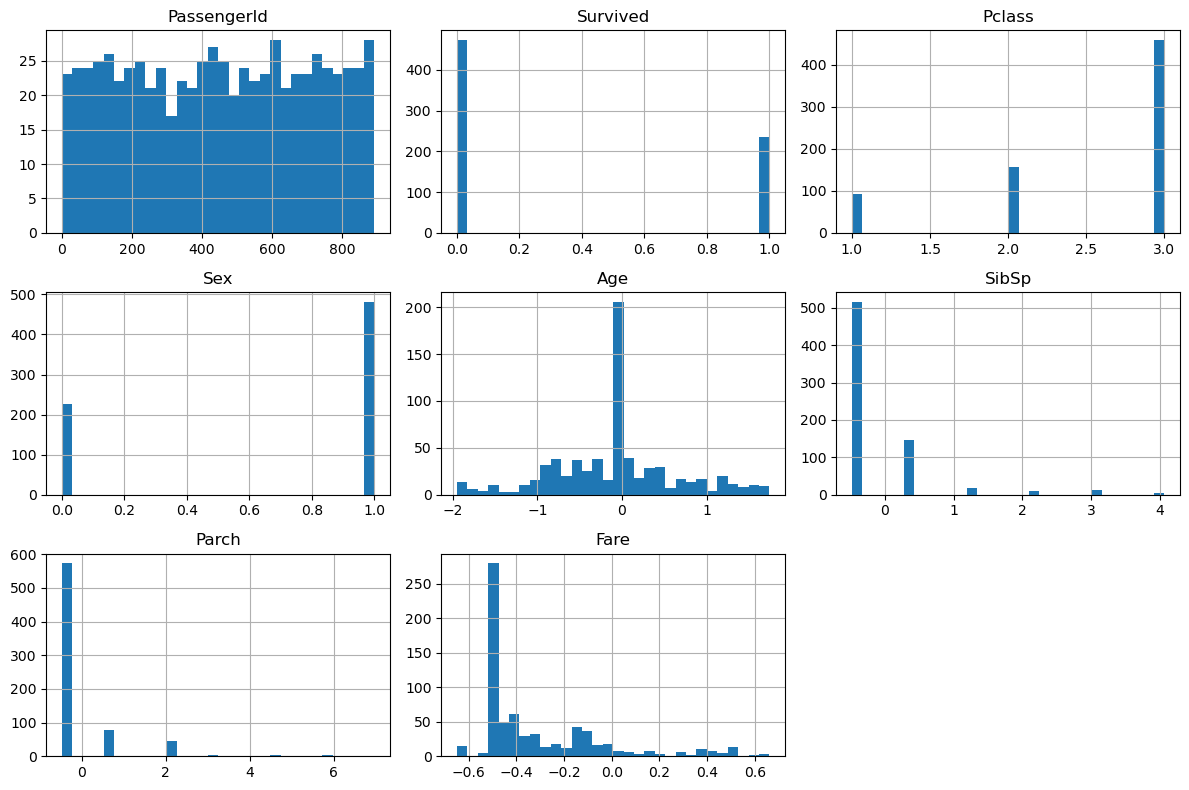

In [7]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Bivariate Analysis

<Axes: ylabel='Survived'>

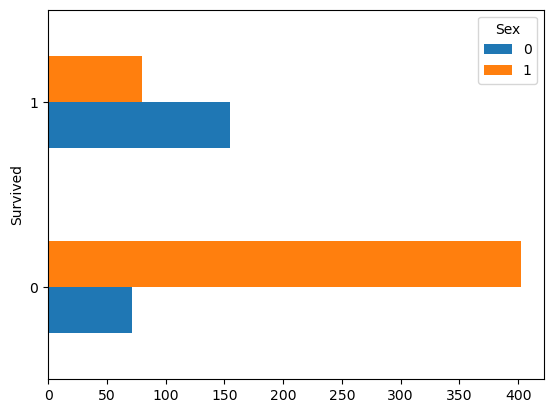

In [19]:
pd.crosstab(df['Survived'],df['Sex'],).plot(kind='barh')

<Axes: xlabel='Age'>

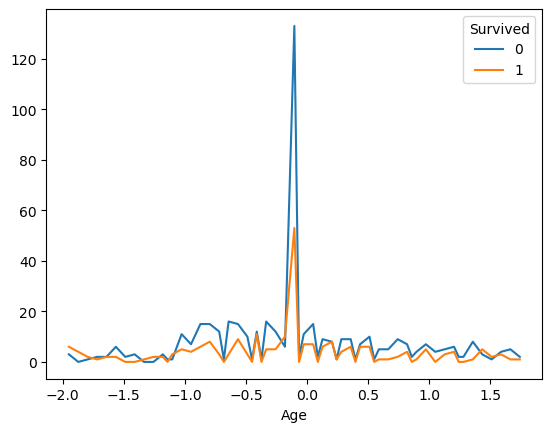

In [21]:
pd.crosstab(df['Age'],df['Survived']).plot(kind='line')

#  Boxplots to Identify Outliers

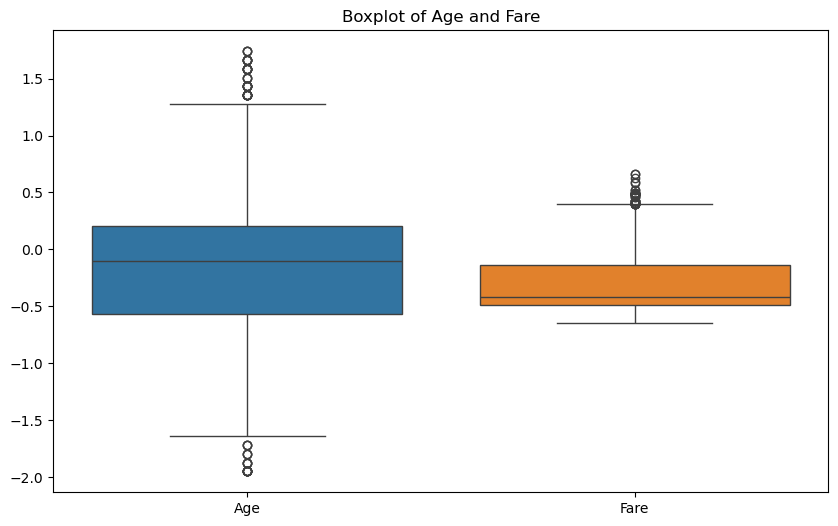

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

# Correlation Matrix

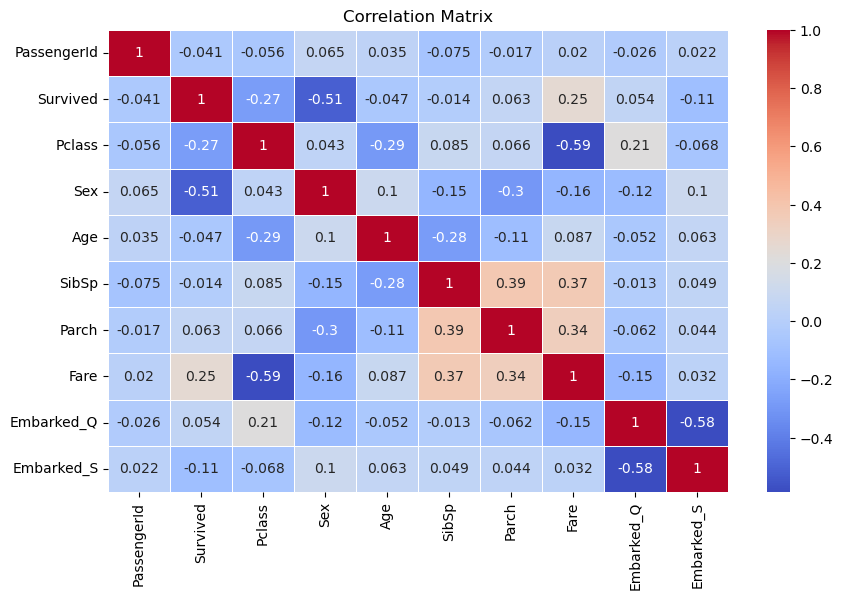

In [10]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


#  Pairplot 

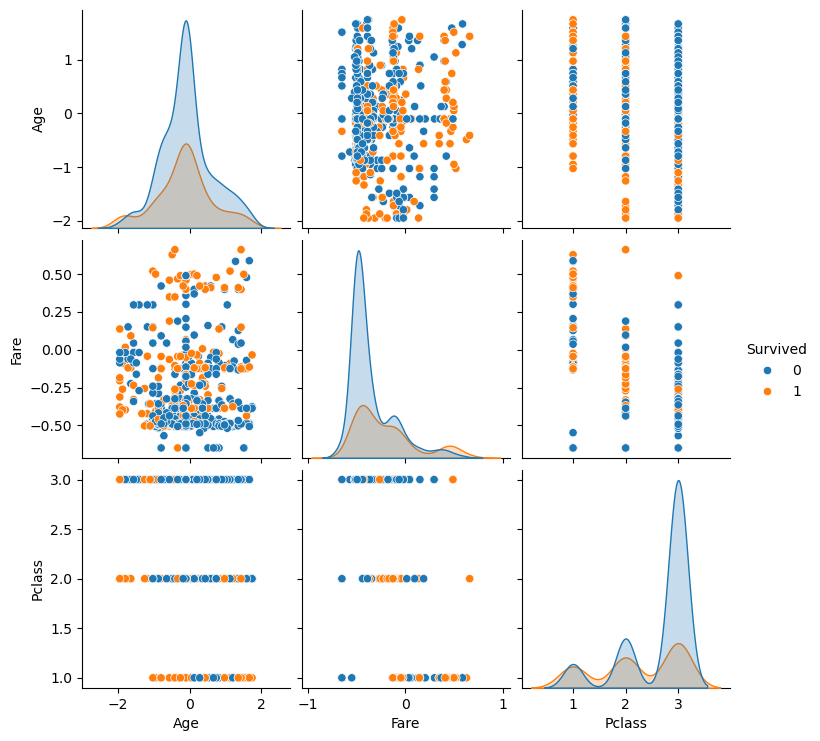

In [11]:
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived')


# Count Plots for Categorical Features

<Axes: xlabel='Survived', ylabel='count'>

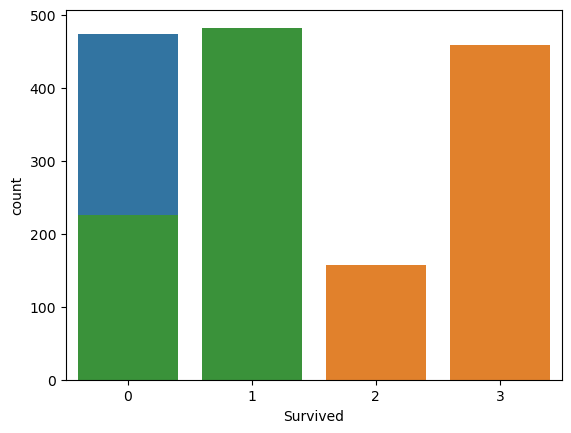

In [13]:
sns.countplot(x='Survived', data=df)
sns.countplot(x='Pclass', data=df)
sns.countplot(x='Sex', data=df)


# Pie Charts

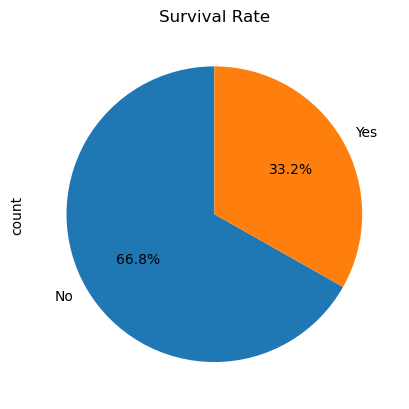

In [14]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90)
plt.title('Survival Rate')
plt.show()


# Feature-Level Insights

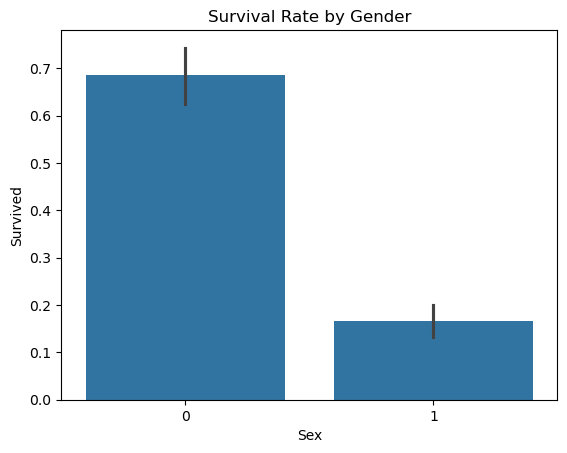

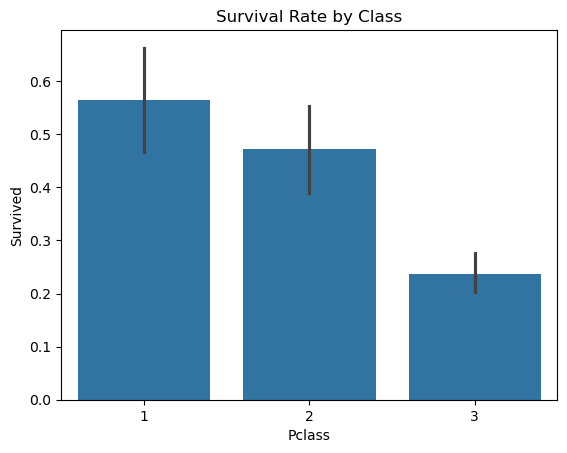

In [22]:
# Survival Rate by Gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


#  Feature-level inferences using data visualization

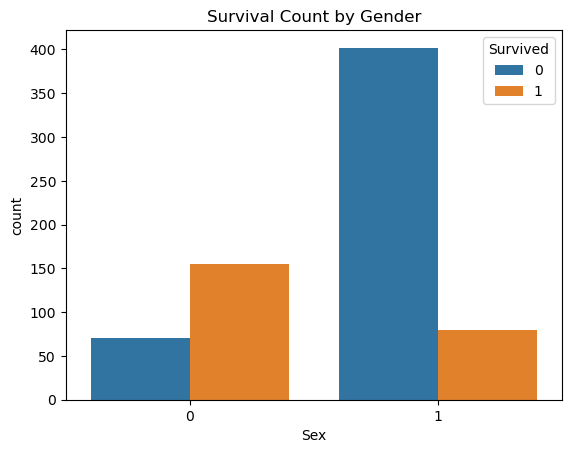

In [23]:
# Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

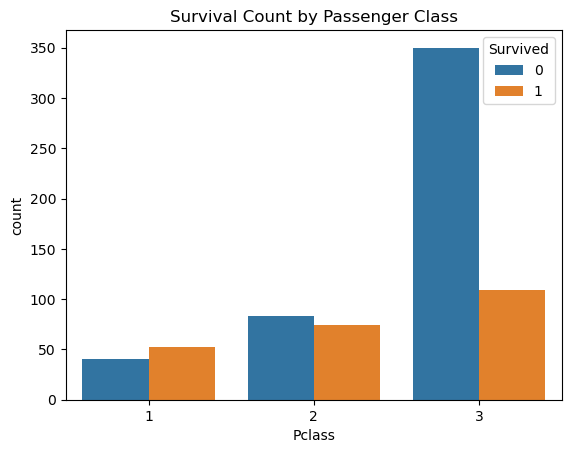

In [24]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


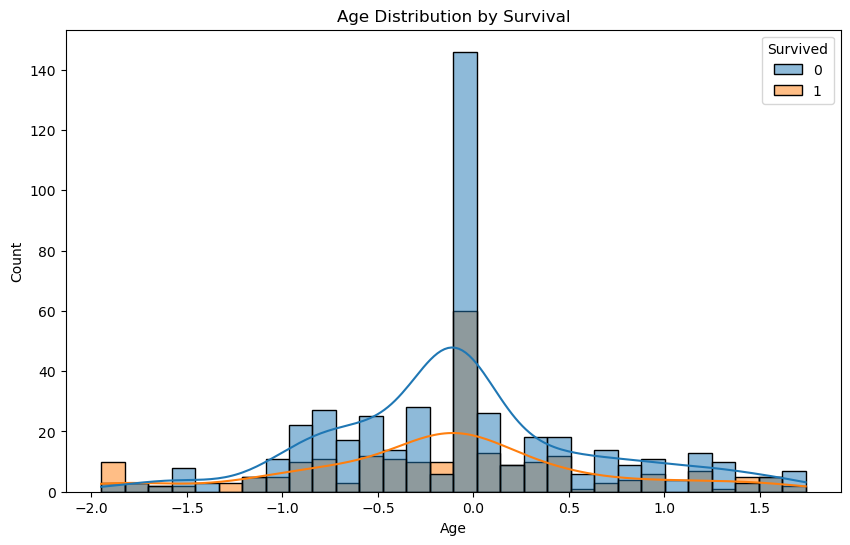

In [26]:
# Age Distribution & Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


In [27]:
# Scatter Plot (Age vs Fare by Survival) – Plotly
fig = px.scatter(df, x='Age', y='Fare', color=df['Survived'].astype(str),
                 title="Age vs Fare (Colored by Survival)",
                 labels={'color': 'Survived'})
fig.show()
